In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
train_data.shape

(466, 11)

<h3>Gender column is Catagorical data so we give it labels as 0 and 1</h3>

In [5]:
train_data['Gender'].replace('Female',0,inplace=True)
train_data['Gender'].replace('Male',1,inplace=True)

In [6]:
train_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [7]:
train_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

<h3>Filling NaN values</h3>

In [8]:
train_data.fillna(method='ffill', inplace=True)

<h2>Feature Selection</h2>

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = train_data.iloc[:,0:10]
y = train_data.iloc[:,-1]    

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score')) 

                        Specs        Score
6  Aspartate_Aminotransferase  8673.470346
5    Alamine_Aminotransferase  5152.449334
4        Alkaline_Phosphotase  3528.858825
2             Total_Bilirubin   272.379517
3            Direct_Bilirubin   146.373962
0                         Age    47.181458
8                     Albumin     3.176682
9  Albumin_and_Globulin_Ratio     1.570112
1                      Gender     0.220826
7              Total_Protiens     0.206391


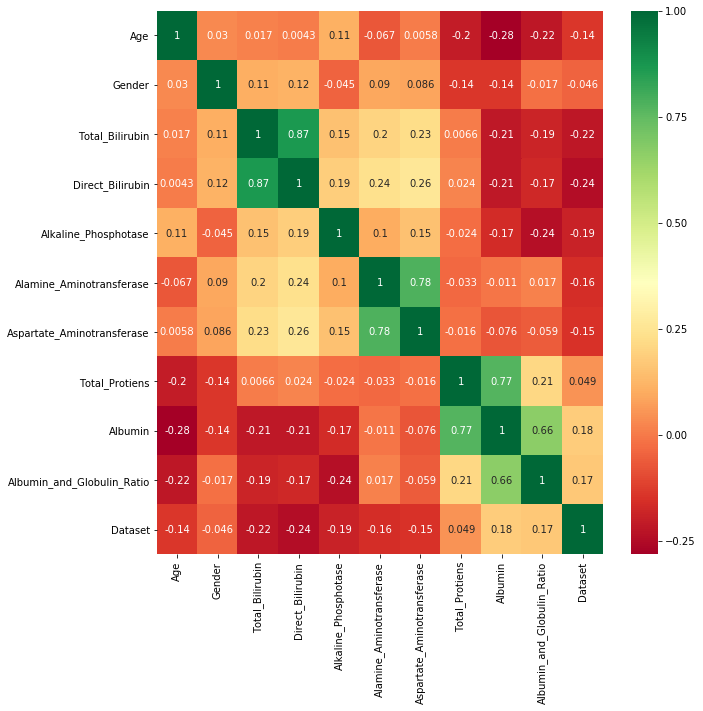

In [10]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
train_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

<h2>Training the train_data</h2>

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [13]:
features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase']

In [14]:
X = train_data[features]
y = train_data.iloc[:, -1:]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

<h3>RandomForest to check accuracy</h3>

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)  
prediction = model.predict(X_test)  

c:\python3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
print('Accuracy: ',metrics.accuracy_score(prediction, y_test) *100)

Accuracy:  76.59574468085107


<h3>Logistic Regression to check accuracy</h3>

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

c:\python3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
print('Accuracy: ', metrics.accuracy_score(pred, y_test)*100)

Accuracy:  75.53191489361703


<h3>Support Vector Classification to check accuracy</h3>

In [22]:
from sklearn.svm import NuSVC

In [23]:
svc = NuSVC()

In [24]:
svc.fit(X_train, y_train)

c:\python3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [25]:
c=svc.predict(X_test)

In [26]:
print('Accuracy: ', metrics.accuracy_score(c, y_test)*100)

Accuracy:  82.97872340425532


<h2>Predicting value of Dataset for test_data(Using SVC)</h2>

In [27]:
test_data = pd.read_csv('test.csv')
test_data['Gender'].replace('Female',0,inplace=True)
test_data['Gender'].replace('Male',1,inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [28]:
newX = test_data[features]

In [29]:
m = svc.predict(newX)
test_data['Dataset'] = m
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,2


In [30]:
m

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
test_data.to_csv('new_test.csv')

In [32]:
test_data.Dataset.value_counts()

1    102
2     15
Name: Dataset, dtype: int64